In [1]:
import pandas as pd

In [7]:
#!pip install opencv-python-headless pillow matplotlib


Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 MB 1.3 MB/s eta 0:00:0000:0100:01


In [2]:
data_path = 'data/Faze1/input/dataset.csv'

In [3]:
data = pd.read_csv(data_path)

In [4]:
data.shape, data.head()

((35887, 2),
    emotion                                             pixels
 0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
 1        0  151 150 147 155 148 133 111 140 170 174 182 15...
 2        2  231 212 156 164 174 138 161 173 182 200 106 38...
 3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
 4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...)

In [5]:
import numpy as np
from main import Images

In [10]:
type(data.loc[0, ' pixels'])

str

In [11]:
# Process the first image
pixel_values = np.array(data[' pixels'].iloc[0].split(), dtype='uint8')

In [14]:
pixel_values.shape

(2304,)

In [32]:
import matplotlib.pyplot as plt

In [44]:
2304/64

36.0

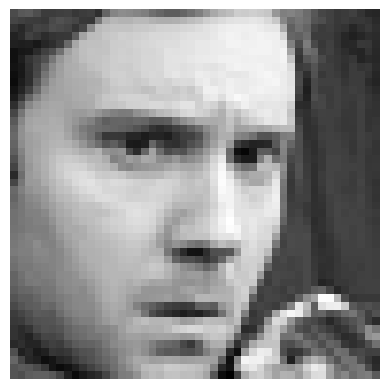

In [46]:
image_array = pixel_values.reshape(48, 48)
plt.imshow(image_array, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
plot(image_array)

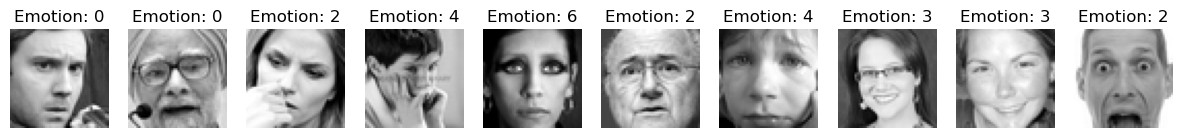

In [20]:
Images.plot(data, 10)

In [22]:
from main import Utilities

In [23]:
# Base directory to store images, grouped by emotion labels
base_image_dir = 'data/Faze1/output/Pics'
labels = data['emotion'].unique()

In [24]:
# Create directories for each label
directories = Utilities.create_directories(base_image_dir, labels)

In [47]:
# Process each image in the dataframe
for index, row in data.iterrows():
    if not Images.save(row, directories[row['emotion']]):
        print(f"Failed to process and save image at index {index}")

In [48]:
# Base directory to store CSVs, grouped by emotion labels
base_csv_dir = 'data/Faze1/output/CSVs'
labels = data['emotion'].unique()

In [49]:
# Create directories for each label
directories = Utilities.create_directories(base_csv_dir, labels)

In [50]:
import os

In [51]:
# Split the dataset by emotion and save each subset into its corresponding directory
for label in labels:
    # Filter data for the current label
    subset = data[data['emotion'] == label]
    # Define file path
    file_path = os.path.join(directories[label], f'data_label_{label}.csv')
    # Save subset to CSV
    subset.to_csv(file_path, index=False)
    print(f"Data for label {label} saved to {file_path}")


Data for label 0 saved to data/Faze1/output/CSVs/0/data_label_0.csv
Data for label 2 saved to data/Faze1/output/CSVs/2/data_label_2.csv
Data for label 4 saved to data/Faze1/output/CSVs/4/data_label_4.csv
Data for label 6 saved to data/Faze1/output/CSVs/6/data_label_6.csv
Data for label 3 saved to data/Faze1/output/CSVs/3/data_label_3.csv
Data for label 5 saved to data/Faze1/output/CSVs/5/data_label_5.csv
Data for label 1 saved to data/Faze1/output/CSVs/1/data_label_1.csv


In [54]:
test = pd.read_csv('data/Faze1/output/CSVs/6/data_label_6.csv')

In [55]:
test.head(), test.tail()

(   emotion                                             pixels
 0        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
 1        6  39 75 78 58 58 45 49 48 103 156 81 45 41 38 49...
 2        6  219 213 206 202 209 217 216 215 219 218 223 23...
 3        6  148 144 130 129 119 122 129 131 139 153 140 12...
 4        6  134 124 167 180 197 194 203 210 204 203 209 20...,
       emotion                                             pixels
 6193        6  87 82 59 61 72 102 143 130 90 95 143 173 146 1...
 6194        6  112 102 98 89 98 133 164 185 180 179 185 169 1...
 6195        6  29 29 27 31 49 56 29 19 22 20 34 43 55 71 85 9...
 6196        6  139 143 145 154 159 168 176 181 190 191 195 19...
 6197        6  50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...)